In [7]:
import yaps
from yaps.lib import *
import numpy as np
from matplotlib import pyplot as plt
import logging
logging.getLogger('pycmdstan.model').setLevel(logging.CRITICAL)

In [8]:
@yaps.model
def coin(x: int(lower=0, upper=1)[10]):
    theta: real(lower=0, upper=1) <~ uniform(0, 1)
    for i in range(1,11):
        x[i] <~ bernoulli(theta)

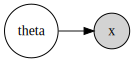

In [9]:
coin.graph

In [10]:
print(coin)

data {
  int<lower=0,upper=1> x[10];
}
parameters {
  real<lower=0,upper=1> theta;
}
model {
  theta ~ uniform(0,1);
  for (i in 1:11 - 1)
    x[i] ~ bernoulli(theta);
}



In [11]:
flips = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1])
coin_obs = coin(x=flips)
coin_obs.sample(data=coin_obs.data, random_='seed=42')

INFO:filelock:Lock 4430624024 acquired on /Users/baudart/.cache/pycmdstan/model-796d8029.lock
INFO:filelock:Lock 4430624024 released on /Users/baudart/.cache/pycmdstan/model-796d8029.lock


mean of theta: 0.254


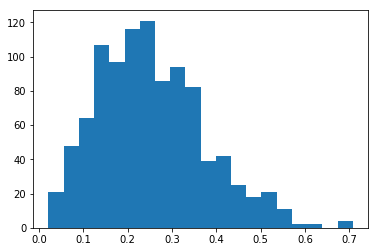

In [12]:
theta = coin_obs.posterior.theta
plt.hist(theta, bins=20)
print('mean of theta: {:.3f}'.format(theta.mean()))